In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [2]:
archivo_csv = 'F:\CarlosJaramillo\ICESI\datos-mcd\9. data\output-26-APR-19.csv'
archivo_headers_csv = 'F:\CarlosJaramillo\ICESI\datos-mcd\9. data\output-26-APR-19_.csv'
df = pd.read_csv(archivo_csv,sep=',')

In [3]:
headers = ["FEC_COL1", "COD_COL2", "COD_COL3", "COD_LAT","COD_LONG","COD_COL6","COD_COL7","COD_COL8","COD_COL9","COD_COL10","FEC_COL11","COD_COL12"] 
with open(archivo_csv, 'r') as f:
    # Read the content of the file
    content = f.readlines()

# Add headers to the content
content_with_headers = [",".join(headers) + "\n"] + content

# Write the modified content to the output file
with open(archivo_headers_csv, 'w') as f:
    f.writelines(content_with_headers)

In [4]:
dfh = pd.read_csv(archivo_headers_csv,sep=',')

In [5]:
dfh.columns

Index(['FEC_COL1', 'COD_COL2', 'COD_COL3', 'COD_LAT', 'COD_LONG', 'COD_COL6',
       'COD_COL7', 'COD_COL8', 'COD_COL9', 'COD_COL10', 'FEC_COL11',
       'COD_COL12'],
      dtype='object')

In [6]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403018 entries, 0 to 2403017
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   FEC_COL1   int64 
 1   COD_COL2   object
 2   COD_COL3   int64 
 3   COD_LAT    int64 
 4   COD_LONG   int64 
 5   COD_COL6   int64 
 6   COD_COL7   int64 
 7   COD_COL8   int64 
 8   COD_COL9   int64 
 9   COD_COL10  int64 
 10  FEC_COL11  object
 11  COD_COL12  int64 
dtypes: int64(10), object(2)
memory usage: 220.0+ MB


In [7]:
print(f"Filas: {dfh.shape[0]}, Columnas: {dfh.shape[1]}") 

Filas: 2403018, Columnas: 12


In [9]:
dfh[dfh['FEC_COL11']=='2019-04-26 00:25:25'].head(3)

,FEC_COL1,COD_COL2,COD_COL3,COD_LAT,COD_LONG,COD_COL6,COD_COL7,COD_COL8,COD_COL9,COD_COL10,FEC_COL11,COD_COL12
2117012,0,26-APR-19,-1,-1,34975367,-765026483,-1,-1,-1,6181975197,2019-04-26 00:25:25,1202
2117013,0,26-APR-19,-1,-1,34975000,-765007900,-1,-1,-1,6181975198,2019-04-26 00:25:25,1173
2117014,0,26-APR-19,500110,3508,34963717,-765037517,-1,999,-1,6181975199,2019-04-26 00:25:25,191


In [10]:
print("Total con este comportamiento: ",(dfh['FEC_COL11'] == '2019-04-26 00:25:25').sum())

Total con este comportamiento:  9


In [11]:
dfh['FEC_COL11'] = dfh['FEC_COL11'].str.replace(' 24:', ' 00:')

In [12]:
dfh['FEC_COL11'] = pd.to_datetime(dfh['FEC_COL11'])

In [13]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403018 entries, 0 to 2403017
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   FEC_COL1   int64         
 1   COD_COL2   object        
 2   COD_COL3   int64         
 3   COD_LAT    int64         
 4   COD_LONG   int64         
 5   COD_COL6   int64         
 6   COD_COL7   int64         
 7   COD_COL8   int64         
 8   COD_COL9   int64         
 9   COD_COL10  int64         
 10  FEC_COL11  datetime64[ns]
 11  COD_COL12  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 220.0+ MB


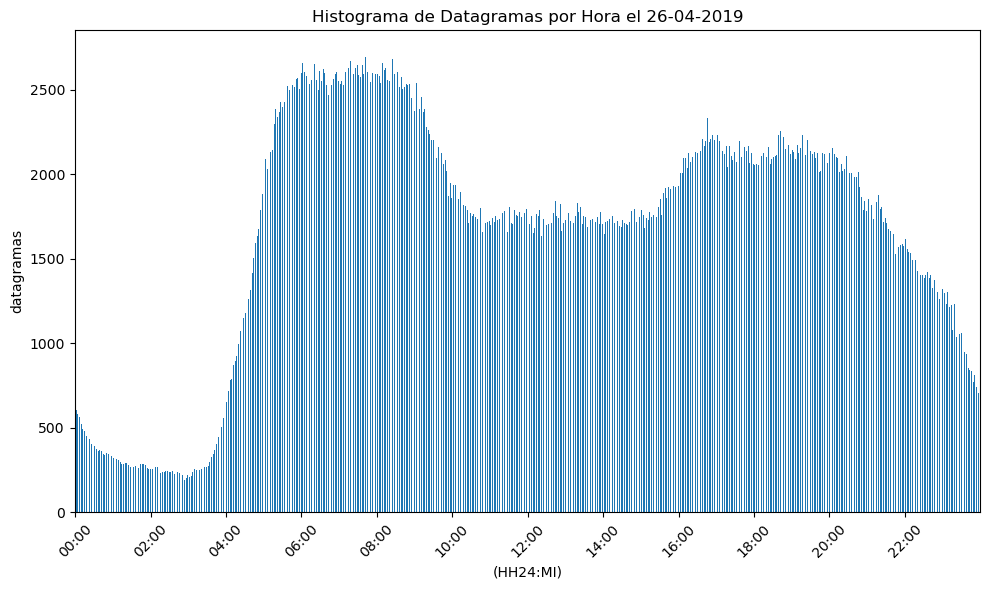

In [16]:
dfh['Hour_Minute'] = dfh['FEC_COL11'].dt.strftime('%H:%M')

# agrupacion de cantidades por hora minuto
hist_data = dfh.groupby('Hour_Minute').size()


hist_data.plot(kind='bar' , figsize=(10, 6))
plt.title('Histograma de Datagramas por Hora el 26-04-2019')
plt.xlabel('(HH24:MI)')
plt.ylabel('datagramas')
n = 120  
plt.xticks(range(0, len(hist_data), n), hist_data.index[::n], rotation=45)
plt.tight_layout()  

plt.show()

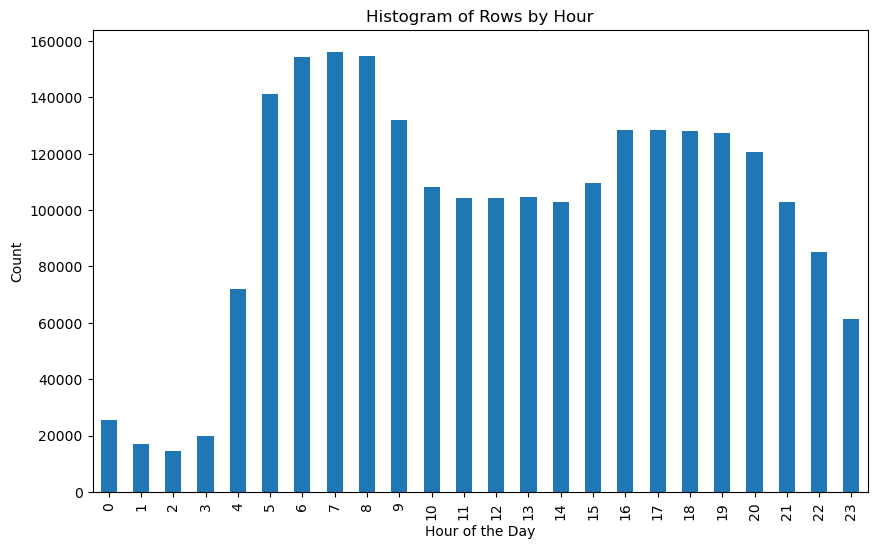

In [15]:
dfh['Hour'] = dfh['FEC_COL11'].dt.hour
 
hist_data = dfh.groupby('Hour').size()

# Plot the histogram
hist_data.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Rows by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()